DETEKSI PENYAKIT JANTUNG

Kelompok : Muhamad Anwar Sanusi (2306016)
           Taslim Nuralim (2306032)

INSTALASI DAN IMPORT LIBRARY

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Kolom yang tidak logis jika bernilai 0
columns_with_zeros = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Buat salinan dan ubah 0 menjadi NaN
df_copy = df.copy()
for col in columns_with_zeros:
    df_copy[col] = df_copy[col].replace(0, np.nan)

# Hitung jumlah dan persentase missing
missing_counts = df_copy.isnull().sum()
missing_percentages = (missing_counts / len(df_copy)) * 100

# Buat DataFrame dari hasil missing
missing_data = pd.DataFrame({
    'Variable': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})

# Ambil hanya yang ada missing-nya
missing_data = missing_data[missing_data['Missing_Count'] > 0]

In [43]:
# Setting untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

1. LOADING DAN PEMBACAAN DATA
Data Gathering: Memuat dataset yang diambil dari kaggle

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/2306016/TB AI/heart.csv")

In [45]:
data = pd.read_csv("/content/drive/MyDrive/2306016/TB AI/heart.csv")
print("Dataset berhasil dimuat. Dimensi dataset:", data.shape)
print(data.head())

Dataset berhasil dimuat. Dimensi dataset: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [46]:
# Tampilkan informasi umum dataset (sesuai Gbr. 2 dalam jurnal)
print(f"Jumlah data: {data.shape[0]} pasien")
print(f"Jumlah variabel: {data.shape[1]} (8 independen + 1 dependen)")
print(f"Tipe data:")
print(data.info())
print("\nSample data (5 teratas):")
print(data.head())

Jumlah data: 1025 pasien
Jumlah variabel: 14 (8 independen + 1 dependen)
Tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Sample data (5 teratas):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0     

2. ANALISIS EKSPLORASI DATA

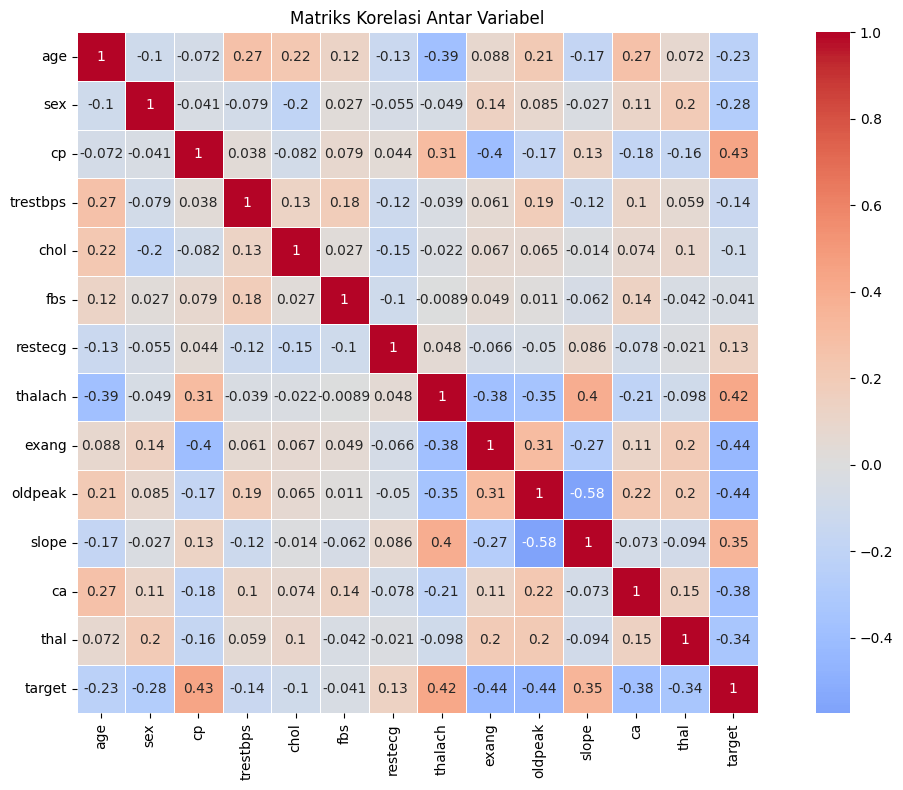

In [47]:
# Matriks korelasi (sesuai Gbr. 3 dalam jurnal)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

In [48]:
print("Korelasi variabel dengan Target (target):")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

Korelasi variabel dengan Target (target):
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


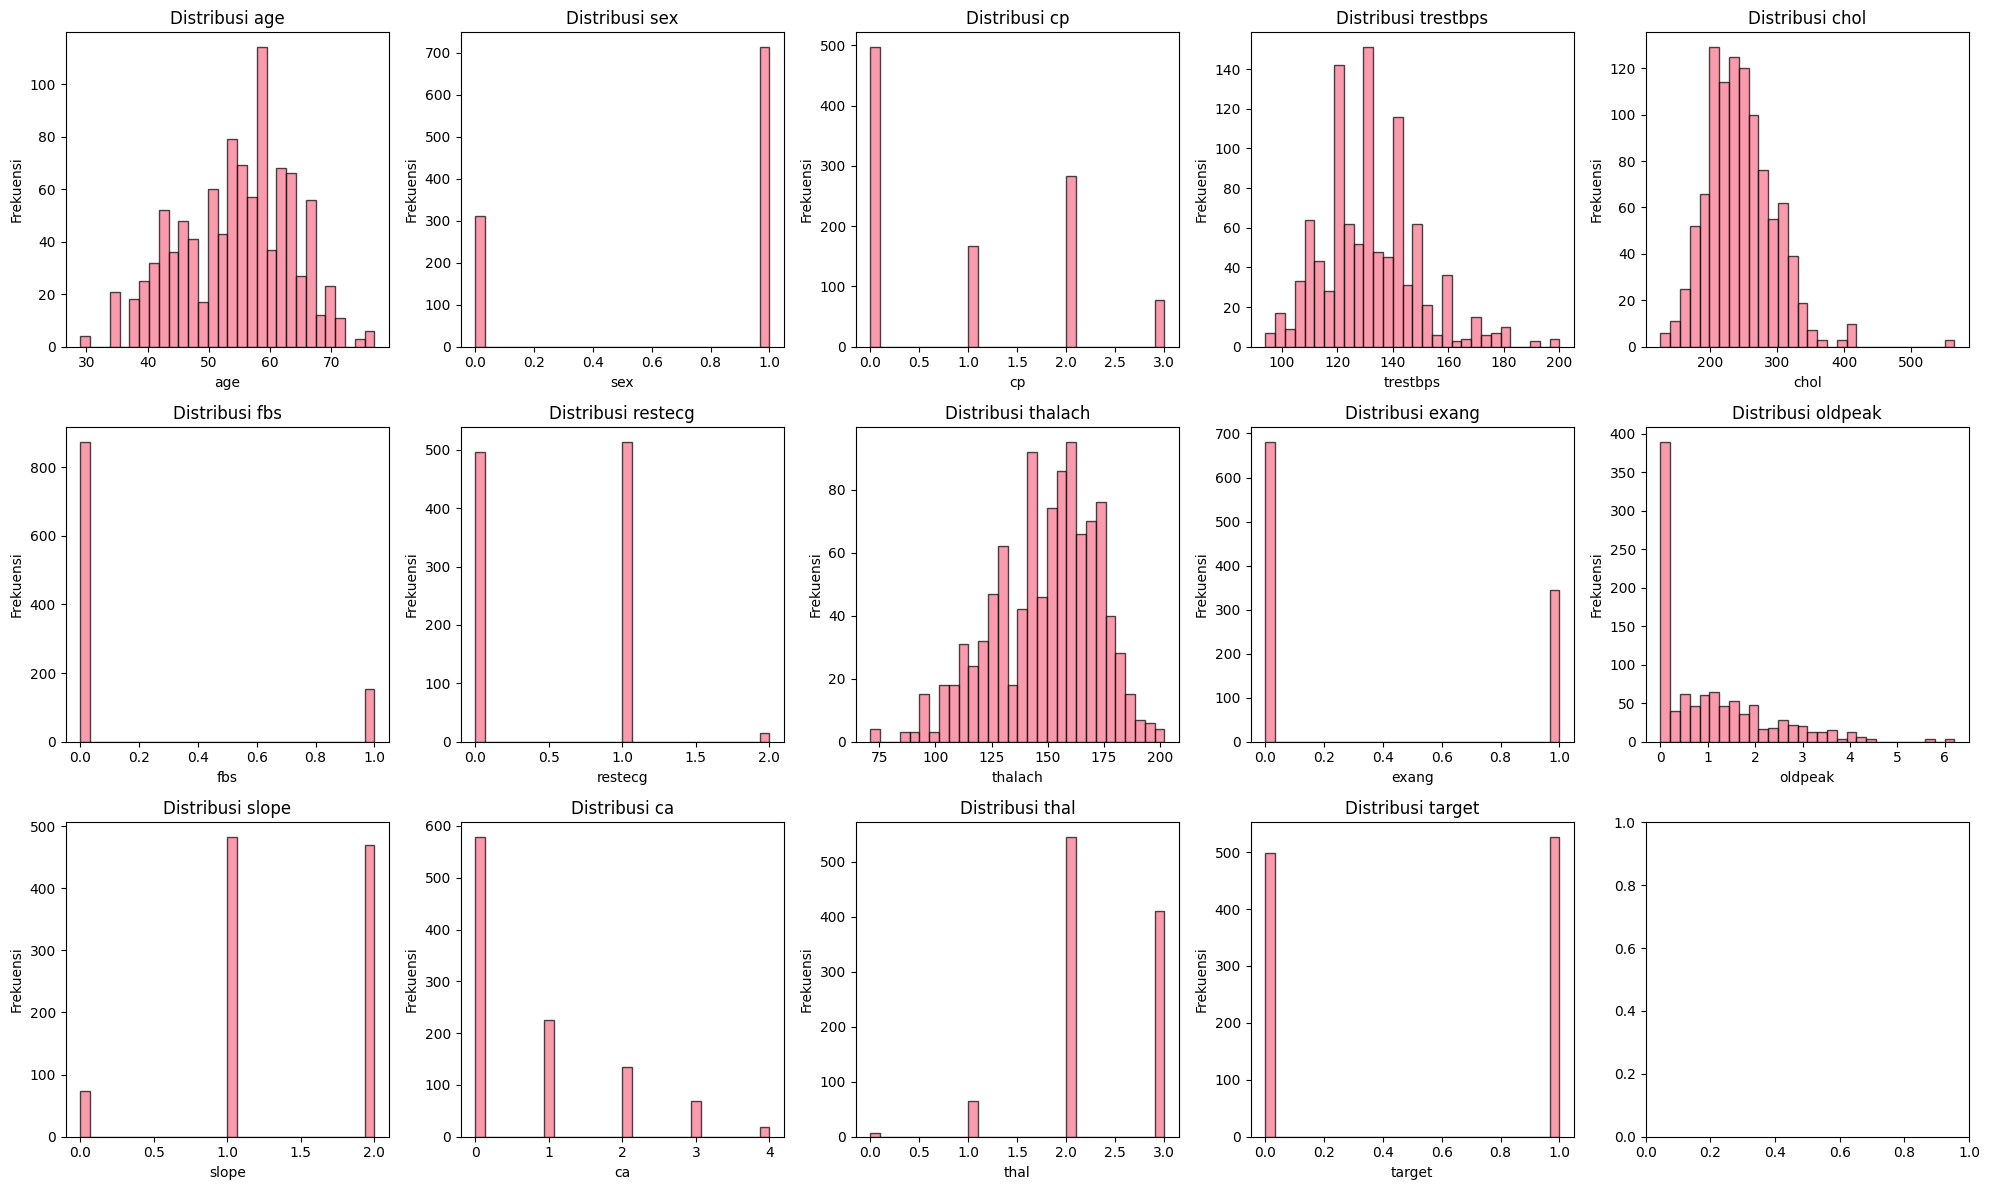

In [49]:
# === Distribusi Plot untuk Masing-Masing Variabel ===
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # Sesuaikan grid dengan jumlah kolom
axes = axes.ravel()

for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()


3. DATA PREPROCESSING

1) Missing Value Analysis


In [50]:
print("Missing Value Analysis:")

# Identifikasi nilai 0 yang seharusnya missing (untuk data penyakit jantung)
columns_with_zeros = ['trestbps', 'chol', 'thalach', 'oldpeak']

import numpy as np
df_copy = df.copy()

# Ganti nilai 0 dengan NaN untuk kolom yang secara medis tidak mungkin bernilai 0
for col in columns_with_zeros:
    df_copy[col] = df_copy[col].replace(0, np.nan)

# Hitung missing values
missing_counts = df_copy.isnull().sum()
missing_percentages = (missing_counts / len(df_copy)) * 100

print("Jumlah dan persentase missing values:")
for col in missing_counts.index:
    if missing_counts[col] > 0:
        print(f"{col}: {missing_counts[col]} ({missing_percentages[col]:.2f}%)")


Missing Value Analysis:
Jumlah dan persentase missing values:
oldpeak: 329 (32.10%)


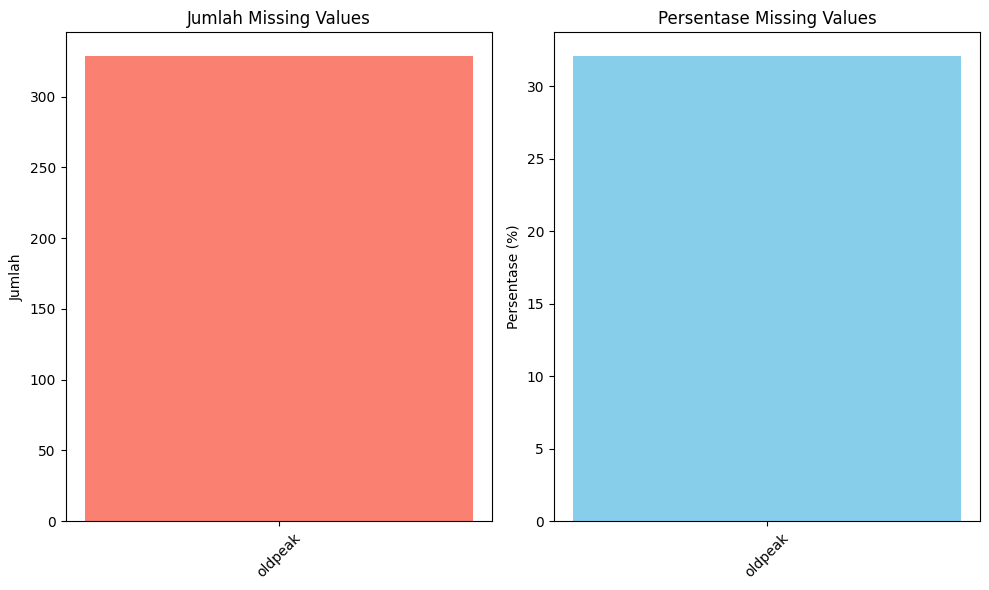

In [51]:
# Visualisasi missing values
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

# Buat DataFrame dari hasil missing value analysis
missing_data = pd.DataFrame({
    'Variabel': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})

# Ambil hanya variabel yang memiliki missing value
missing_data = missing_data[missing_data['Missing_Count'] > 0]

# Plot jika ada missing value
if not missing_data.empty:
    plt.subplot(1, 2, 1)
    plt.bar(missing_data['Variabel'], missing_data['Missing_Count'], color='salmon')
    plt.title('Jumlah Missing Values')
    plt.xticks(rotation=45)
    plt.ylabel('Jumlah')

    plt.subplot(1, 2, 2)
    plt.bar(missing_data['Variabel'], missing_data['Missing_Percentage'], color='skyblue')
    plt.title('Persentase Missing Values')
    plt.xticks(rotation=45)
    plt.ylabel('Persentase (%)')

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada missing value yang perlu divisualisasikan.")


In [52]:
print("\nJumlah missing value setelah penggantian 0:")
print(df_copy.isnull().sum())


Jumlah missing value setelah penggantian 0:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak     329
slope         0
ca            0
thal          0
target        0
dtype: int64


In [38]:
print("\nMengisi missing value dengan median masing-masing kolom...")
for col in columns_with_zeros:
    median_value = df_copy[col].median()
    df_copy[col].fillna(median_value, inplace=True)
    print(f"{col} diisi dengan median: {median_value}")



Mengisi missing value dengan median masing-masing kolom...
trestbps diisi dengan median: 130.0
chol diisi dengan median: 240.0
thalach diisi dengan median: 152.0
oldpeak diisi dengan median: 1.4


In [53]:
print("\nNormalisasi fitur...")
X = df_copy.drop("target", axis=1)
y = df_copy["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Normalisasi fitur...



Missing Value Analysis Setelah Pengisian:
oldpeak: 329 (32.10%)


<Figure size 1200x600 with 0 Axes>

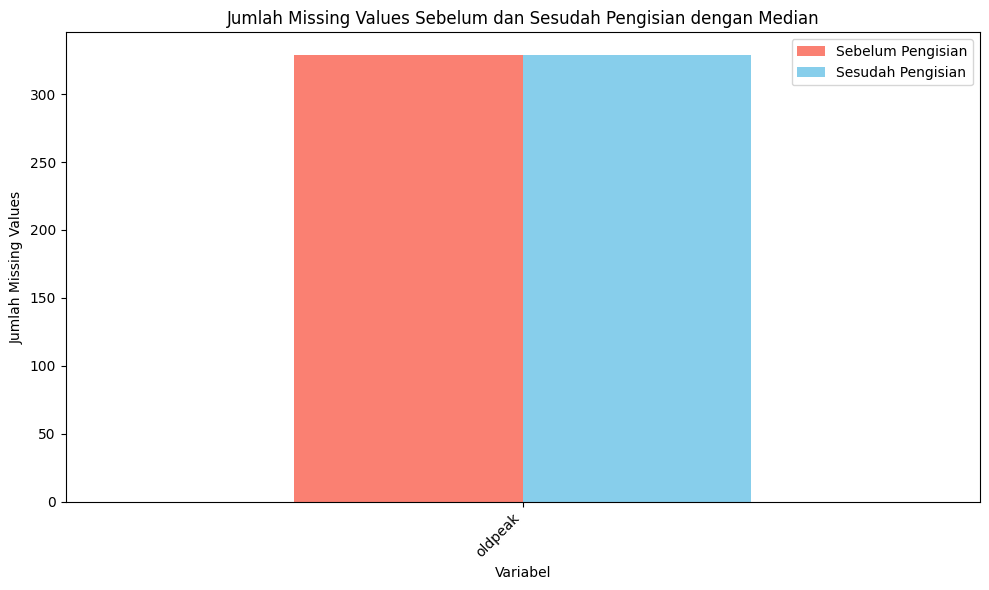


Informasi dataset setelah pengisian missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   696 non-null    float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Jumlah missing values setelah pengisian:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thal

In [54]:
# === 2) Visualisasi Missing Value Setelah Diisi ===

# Hitung ulang missing values setelah pengisian
missing_counts_after = df_copy.isnull().sum()

print("\nMissing Value Analysis Setelah Pengisian:")
for col in missing_counts_after.index:
    if missing_counts_after[col] > 0:
        print(f"{col}: {missing_counts_after[col]} ({missing_percentages[col]:.2f}%)")

# Visualisasi: sebelum vs sesudah pengisian
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

# Data untuk visualisasi
missing_data_before = pd.DataFrame({
    'Variabel': missing_counts.index,
    'Jumlah Missing Before': missing_counts.values
}).set_index('Variabel')

missing_data_after = pd.DataFrame({
    'Variabel': missing_counts_after.index,
    'Jumlah Missing After': missing_counts_after.values
}).set_index('Variabel')

# Gabungkan data sebelum dan sesudah
combined_missing_data = (
    missing_data_before[missing_data_before['Jumlah Missing Before'] > 0]
    .join(missing_data_after)
)

# Plot hanya jika memang ada missing sebelumnya
if not combined_missing_data.empty:
    combined_missing_data[['Jumlah Missing Before', 'Jumlah Missing After']].plot(
        kind='bar', figsize=(10, 6), color=['salmon', 'skyblue']
    )
    plt.title('Jumlah Missing Values Sebelum dan Sesudah Pengisian dengan Median')
    plt.xlabel('Variabel')
    plt.ylabel('Jumlah Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.legend(['Sebelum Pengisian', 'Sesudah Pengisian'])
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada missing value yang terdeteksi sebelum atau sesudah pengisian.")

# Tampilkan info dan verifikasi akhir
print("\nInformasi dataset setelah pengisian missing values:")
print(df_copy.info())

print("\nJumlah missing values setelah pengisian:")
print(df_copy.isnull().sum())


In [55]:
# Update dataframe utama
df = df_copy.copy()

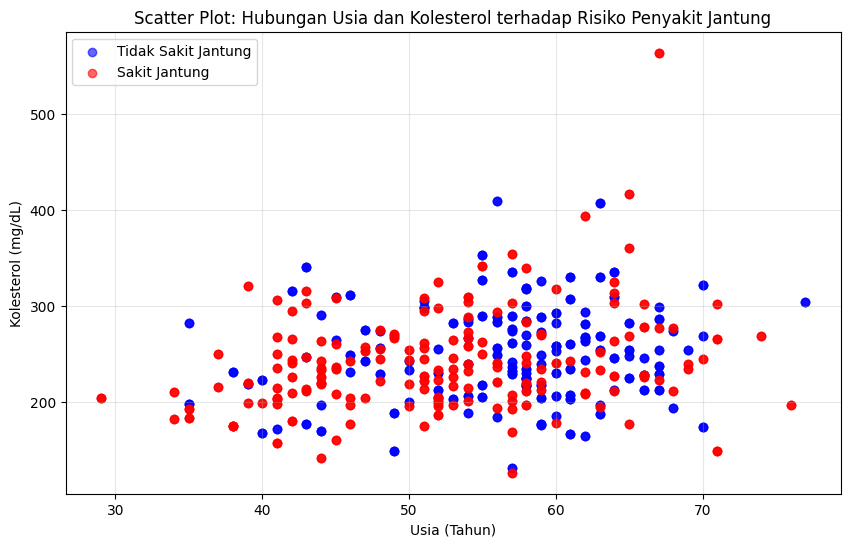

In [45]:
# Scatter plot Age vs Chol (meniru Gambar 6 pada jurnal diabetes, tapi untuk penyakit jantung)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = ['blue', 'red']
labels = ['Tidak Sakit Jantung', 'Sakit Jantung']

# Plot berdasarkan nilai target: 0 = tidak sakit, 1 = sakit
for i, target in enumerate([0, 1]):
    subset = df[df['target'] == target]
    plt.scatter(subset['age'], subset['chol'],
                c=colors[i], label=labels[i], alpha=0.6)

plt.xlabel('Usia (Tahun)')
plt.ylabel('Kolesterol (mg/dL)')
plt.title('Scatter Plot: Hubungan Usia dan Kolesterol terhadap Risiko Penyakit Jantung')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Data Tidak Seimbang

In [56]:
print("\nAnalisis Data Tidak Seimbang:")

target_counts = df['target'].value_counts()
target_percentages = df['target'].value_counts(normalize=True) * 100

print(f"Tidak Sakit Jantung (0): {target_counts.get(0, 0)} ({target_percentages.get(0, 0):.1f}%)")
print(f"Sakit Jantung (1): {target_counts.get(1, 0)} ({target_percentages.get(1, 0):.1f}%)")



Analisis Data Tidak Seimbang:
Tidak Sakit Jantung (0): 499 (48.7%)
Sakit Jantung (1): 526 (51.3%)


In [57]:
import matplotlib.pyplot as plt

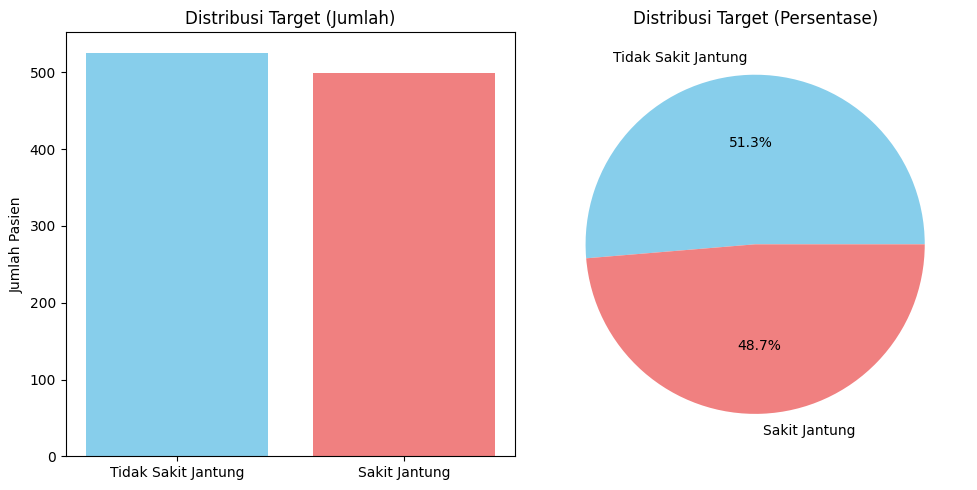

In [59]:
# Hitung distribusi target
target_counts = df['target'].value_counts()

# Visualisasi distribusi target
plt.figure(figsize=(10, 5))

# Bar chart
plt.subplot(1, 2, 1)
plt.bar(['Tidak Sakit Jantung', 'Sakit Jantung'], target_counts.values,
        color=['skyblue', 'lightcoral'])
plt.title('Distribusi Target (Jumlah)')
plt.ylabel('Jumlah Pasien')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['Tidak Sakit Jantung', 'Sakit Jantung'],
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Target (Persentase)')

plt.tight_layout()
plt.show()

4. PEMBAGIAN DATA DAN NORMALISASI

In [60]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Split data 70:30 (seperti di jurnal)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Data training: {X_train.shape[0]} samples")
print(f"Data testing: {X_test.shape[0]} samples")


Data training: 717 samples
Data testing: 308 samples


In [63]:
columns_with_zeros = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Ganti 0 dengan NaN di X_train dan X_test
for col in columns_with_zeros:
    X_train[col] = X_train[col].replace(0, np.nan)
    X_test[col] = X_test[col].replace(0, np.nan)


In [67]:
for col in columns_with_zeros:
    median = X_train[col].median()
    X_train[col].fillna(median, inplace=True)
    X_test[col].fillna(median, inplace=True)


/tmp/ipython-input-67-121239156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median, inplace=True)
/tmp/ipython-input-67-121239156.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [65]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
print("\nMenerapkan SMOTE untuk mengatasi data tidak seimbang...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Cek distribusi setelah SMOTE
print(f"Sebelum SMOTE - Sakit Jantung: {sum(y_train)} | Tidak Sakit: {len(y_train) - sum(y_train)}")
print(f"Setelah SMOTE - Sakit Jantung: {sum(y_train_balanced)} | Tidak Sakit: {len(y_train_balanced) - sum(y_train_balanced)}")



Menerapkan SMOTE untuk mengatasi data tidak seimbang...
Sebelum SMOTE - Sakit Jantung: 368 | Tidak Sakit: 349
Setelah SMOTE - Sakit Jantung: 368 | Tidak Sakit: 368


In [66]:
print("Cek NaN X_train:", np.isnan(X_train_scaled).sum())

Cek NaN X_train: 0


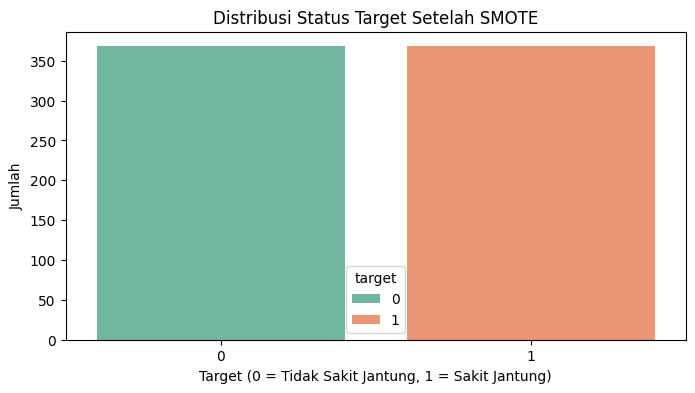

In [19]:
# Gabungkan fitur dan target hasil SMOTE ke dalam DataFrame untuk visualisasi
data_balanced = pd.DataFrame(X_train_balanced, columns=X.columns)
data_balanced['target'] = y_train_balanced

# Bar plot untuk kolom 'target'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x="target", hue="target", data=data_balanced, palette="Set2")
plt.title("Distribusi Status Target Setelah SMOTE")
plt.xlabel("Target (0 = Tidak Sakit Jantung, 1 = Sakit Jantung)")
plt.ylabel("Jumlah")
plt.show()



Analisis Outlier:


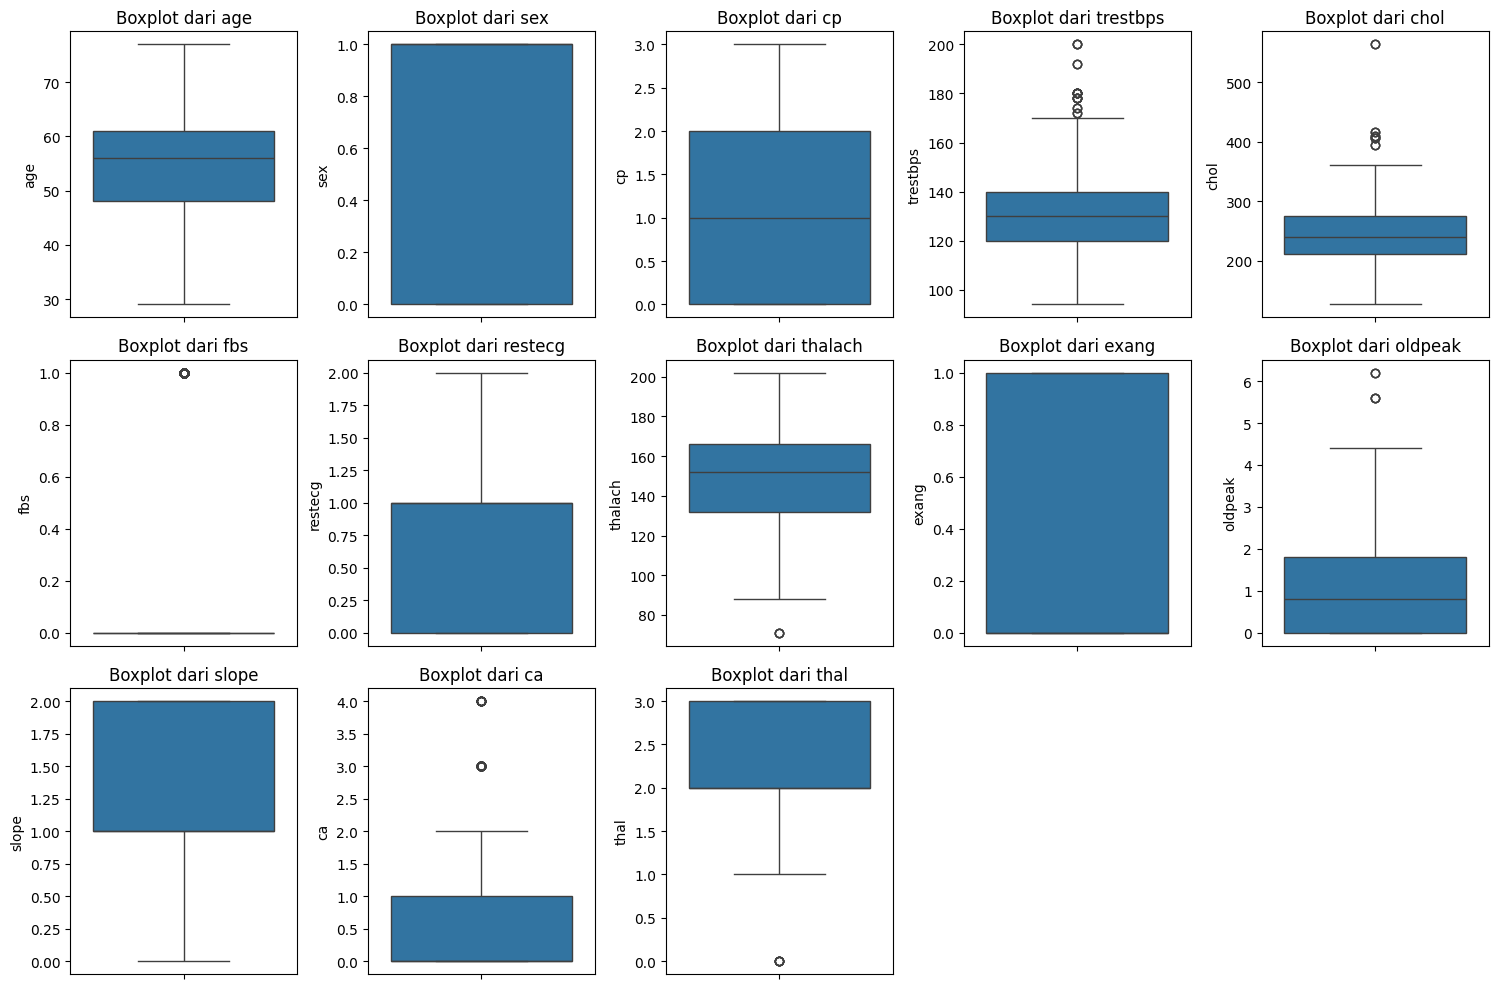

In [20]:
print("\nAnalisis Outlier:")

# Gunakan semua kolom numerik kecuali kolom target
numerical_cols = df.drop('target', axis=1).columns  # df adalah DataFrame utama

# Buat boxplot untuk setiap fitur numerik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)  # Ada 13 fitur, 3 baris x 5 kolom cukup
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot dari {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



Mendeteksi dan menangani Outlier (menggunakan IQR):
Jumlah outlier pada kolom 'age': 0
Jumlah outlier pada kolom 'trestbps': 30
Jumlah outlier pada kolom 'chol': 16
Jumlah outlier pada kolom 'thalach': 4
Jumlah outlier pada kolom 'oldpeak': 7
Jumlah outlier pada kolom 'ca': 87
Jumlah outlier pada kolom 'thal': 7


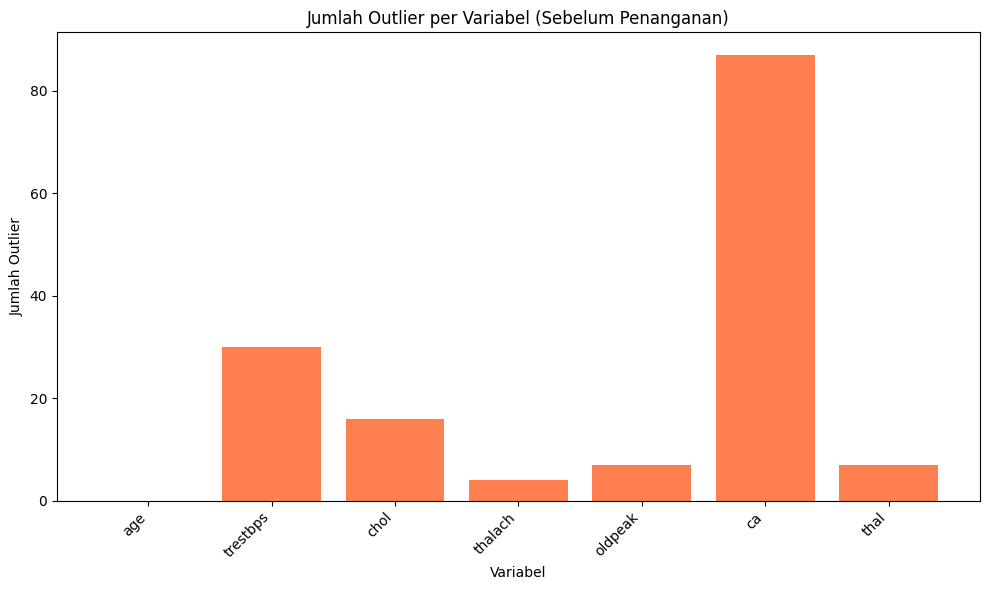


Menangani outlier dengan mengganti nilainya menggunakan batas IQR...

Jumlah outlier per kolom setelah penanganan:
Jumlah outlier pada kolom 'age': 0
Jumlah outlier pada kolom 'trestbps': 0
Jumlah outlier pada kolom 'chol': 0
Jumlah outlier pada kolom 'thalach': 0
Jumlah outlier pada kolom 'oldpeak': 0
Jumlah outlier pada kolom 'ca': 0
Jumlah outlier pada kolom 'thal': 0


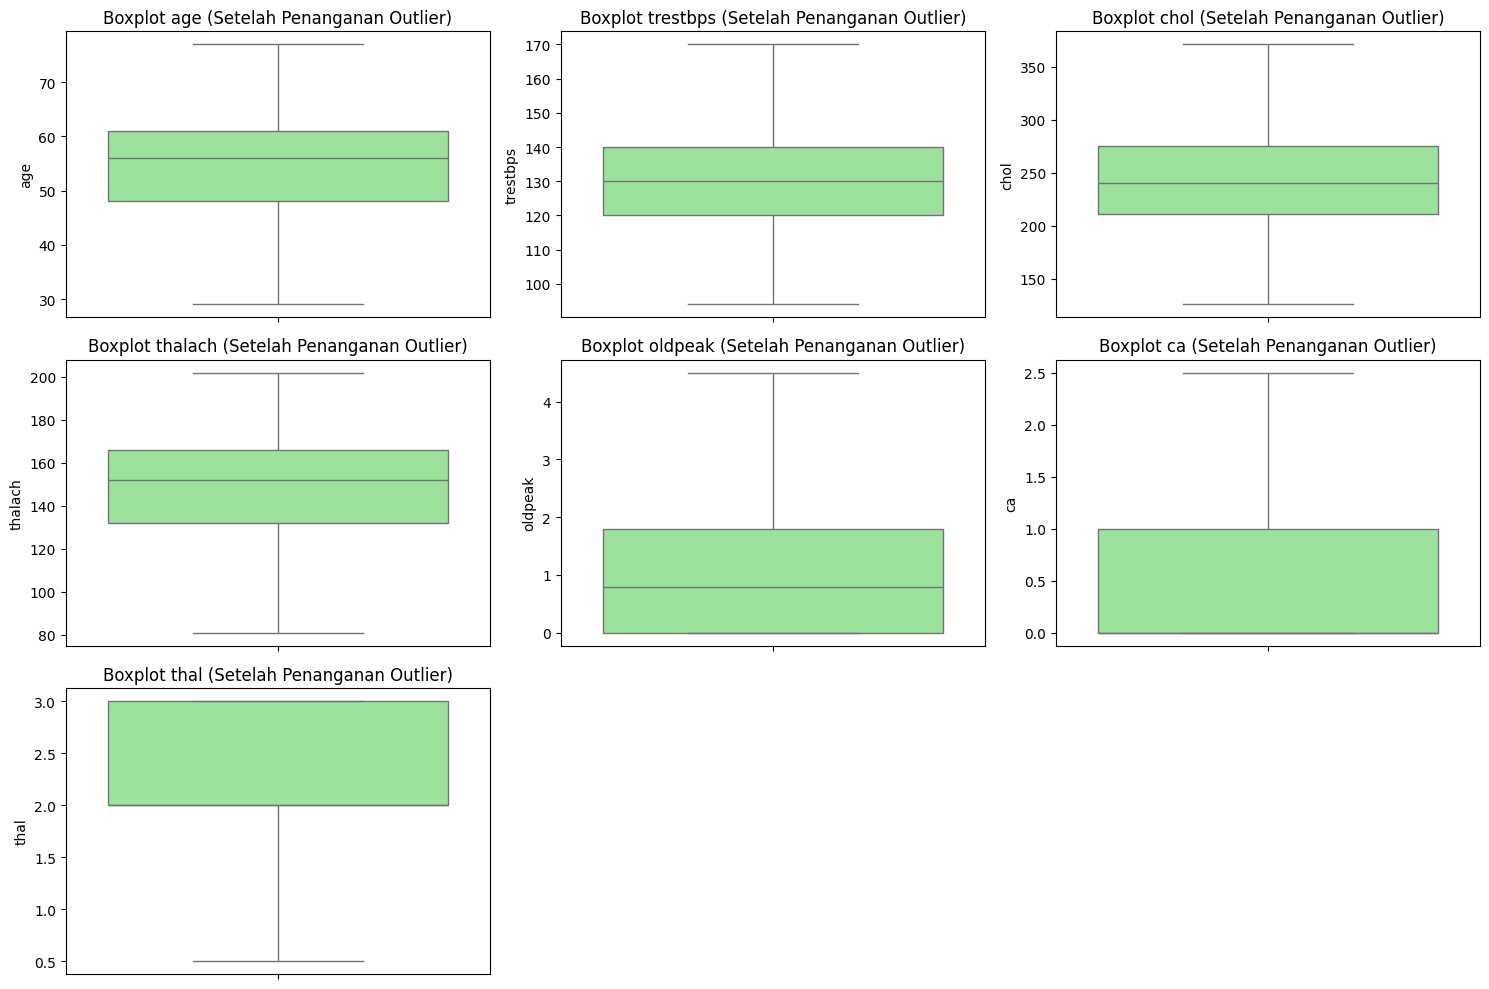

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Kolom numerik utama yang akan dicek outlier-nya
outlier_cols_check = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

print("\nMendeteksi dan menangani Outlier (menggunakan IQR):")
df_no_outlier = df.copy()  # Salin dataset asli

# Identifikasi outlier di setiap kolom
outliers_summary = {}
for col in outlier_cols_check:
    outliers = detect_outliers_iqr(df_no_outlier, col)
    outliers_summary[col] = len(outliers)
    print(f"Jumlah outlier pada kolom '{col}': {len(outliers)}")

# Visualisasi jumlah outlier per kolom
if sum(outliers_summary.values()) > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(outliers_summary.keys(), outliers_summary.values(), color='coral')
    plt.title('Jumlah Outlier per Variabel (Sebelum Penanganan)')
    plt.xlabel('Variabel')
    plt.ylabel('Jumlah Outlier')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada outlier yang terdeteksi.")

# Penanganan Outlier: Capping menggunakan batas IQR
print("\nMenangani outlier dengan mengganti nilainya menggunakan batas IQR...")

for col in outlier_cols_check:
    Q1 = df_no_outlier[col].quantile(0.25)
    Q3 = df_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outlier[col] = np.where(df_no_outlier[col] < lower_bound, lower_bound, df_no_outlier[col])
    df_no_outlier[col] = np.where(df_no_outlier[col] > upper_bound, upper_bound, df_no_outlier[col])

# Verifikasi ulang jumlah outlier setelah penanganan
print("\nJumlah outlier per kolom setelah penanganan:")
outliers_after_treatment = {}
for col in outlier_cols_check:
    outliers = detect_outliers_iqr(df_no_outlier, col)
    outliers_after_treatment[col] = len(outliers)
    print(f"Jumlah outlier pada kolom '{col}': {len(outliers)}")

# Visualisasi boxplot setelah penanganan
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_cols_check):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_no_outlier[col], color='lightgreen')
    plt.title(f'Boxplot {col} (Setelah Penanganan Outlier)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


5. MODEL DASAR LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression

# Bangun model Logistic Regression dasar
lr_base = LogisticRegression(random_state=42, max_iter=1000)
lr_base.fit(X_train_balanced, y_train_balanced)


LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Prediksi
y_pred_base = lr_base.predict(X_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score

# Lakukan prediksi terlebih dahulu (jika belum)
y_pred_base = lr_base.predict(X_test_scaled)

# Evaluasi model
print("EVALUASI MODEL DASAR:")
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Akurasi: {accuracy_base:.2f}")


EVALUASI MODEL DASAR:
Akurasi: 0.82


In [28]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm_base = confusion_matrix(y_test, y_pred_base)

print("\nConfusion Matrix:")
print(cm_base)



Confusion Matrix:
[[116  34]
 [ 21 137]]


In [29]:
from sklearn.metrics import classification_report

print("\nClassification Report:")

# Dapatkan dan cetak classification report
report_base = classification_report(y_test, y_pred_base, output_dict=True)
print(classification_report(y_test, y_pred_base, target_names=["Tidak Sakit", "Sakit"]))



Classification Report:
              precision    recall  f1-score   support

 Tidak Sakit       0.85      0.77      0.81       150
       Sakit       0.80      0.87      0.83       158

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



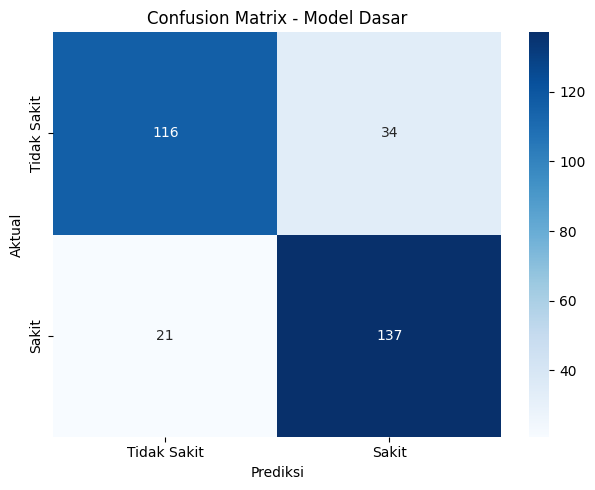

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Sakit', 'Sakit'],
            yticklabels=['Tidak Sakit', 'Sakit'])

plt.title('Confusion Matrix - Model Dasar')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.tight_layout()
plt.show()


In [31]:
# Hitung nilai tn, fp, fn, tp dari confusion matrix
tn, fp, fn, tp = cm_base.ravel()

# Hitung metrik manual sesuai rumus
accuracy_manual = (tp + tn) / (tp + fp + fn + tn)
precision_manual = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_manual = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_manual = 2 * (recall_manual * precision_manual) / (recall_manual + precision_manual) if (recall_manual + precision_manual) > 0 else 0

# Cetak hasil
print(f"\nMetrik Manual (berdasarkan rumus jurnal):")
print(f"True Positive (tp): {tp}")
print(f"True Negative (tn): {tn}")
print(f"False Positive (fp): {fp}")
print(f"False Negative (fn): {fn}")
print(f"Akurasi: {accuracy_manual:.2f} ({accuracy_manual*100:.0f}%)")
print(f"Presisi: {precision_manual:.2f} ({precision_manual*100:.0f}%)")
print(f"Recall: {recall_manual:.2f} ({recall_manual*100:.0f}%)")
print(f"F1-Score: {f1_manual:.2f} ({f1_manual*100:.0f}%)")



Metrik Manual (berdasarkan rumus jurnal):
True Positive (tp): 137
True Negative (tn): 116
False Positive (fp): 34
False Negative (fn): 21
Akurasi: 0.82 (82%)
Presisi: 0.80 (80%)
Recall: 0.87 (87%)
F1-Score: 0.83 (83%)


6. HYPERPARAMETER TUNING DENGAN GRID SEARCH

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid yang diuji
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 0.6158, 1.0, 1.5, 2.0, 5.0, 10.0]
}

print("Parameter grid untuk Grid Search:")
print(f"Penalty: {param_grid['penalty']}")
print(f"C values: {param_grid['C']}")

# Grid Search dengan Cross Validation (5-fold)
print("\nMelakukan Grid Search...")

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

# Latih model dengan data training yang sudah di-SMOTE
grid_search.fit(X_train_balanced, y_train_balanced)


Parameter grid untuk Grid Search:
Penalty: ['l1', 'l2']
C values: [0.1, 0.5, 0.6158, 1.0, 1.5, 2.0, 5.0, 10.0]

Melakukan Grid Search...


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.6158, 1.0, 1.5, 2.0, 5.0, 10.0],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')


7. MODEL TERBAIK SETELAH HYPERPARAMETER TUNING

In [68]:
print("✓ Grid Search selesai")
print(f"Parameter terbaik: {grid_search.best_params_}")
print(f"Skor CV terbaik: {grid_search.best_score_:.4f}")

✓ Grid Search selesai
Parameter terbaik: {'C': 0.1, 'penalty': 'l2'}
Skor CV terbaik: 0.8505


In [33]:
# Ambil model terbaik dari Grid Search
lr_best = grid_search.best_estimator_

# Lakukan prediksi pada data uji (yang sudah dinormalisasi)
y_pred_best = lr_best.predict(X_test_scaled)


In [34]:
# Evaluasi model terbaik
print("EVALUASI MODEL TERBAIK:")
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Akurasi: {accuracy_best:.2f}")

EVALUASI MODEL TERBAIK:
Akurasi: 0.81


In [35]:
# Confusion Matrix model terbaik
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(cm_best)


Confusion Matrix:
[[111  39]
 [ 20 138]]


In [36]:
print("\nClassification Report:")
report_best = classification_report(y_test, y_pred_best, output_dict=True)
print(classification_report(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       150
           1       0.78      0.87      0.82       158

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308



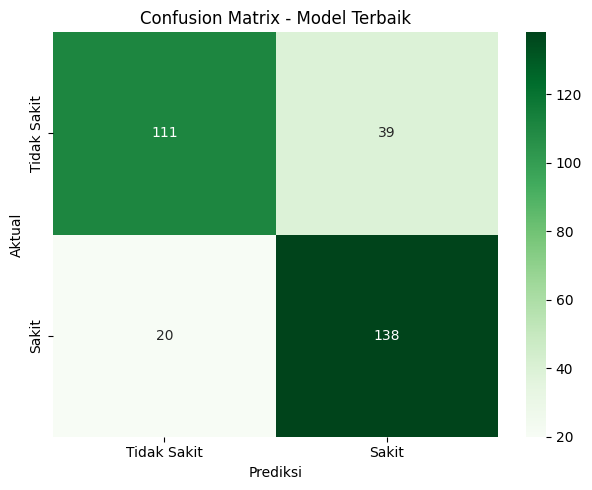

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Visualisasi Confusion Matrix - Model Terbaik
plt.subplot(1, 2, 2)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Tidak Sakit', 'Sakit'],
            yticklabels=['Tidak Sakit', 'Sakit'])

plt.title('Confusion Matrix - Model Terbaik')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.tight_layout()
plt.show()


In [39]:
# Ambil nilai dari confusion matrix model terbaik
tn_best, fp_best, fn_best, tp_best = cm_best.ravel()

# Hitung metrik manual
accuracy_best_manual = (tp_best + tn_best) / (tp_best + fp_best + fn_best + tn_best)
precision_best_manual = tp_best / (tp_best + fp_best) if (tp_best + fp_best) > 0 else 0
recall_best_manual = tp_best / (tp_best + fn_best) if (tp_best + fn_best) > 0 else 0
f1_best_manual = 2 * (recall_best_manual * precision_best_manual) / (recall_best_manual + precision_best_manual) if (recall_best_manual + precision_best_manual) > 0 else 0

# Tampilkan hasil metrik manual
print(f"\nMetrik Manual Model Terbaik:")
print(f"True Positive (tp): {tp_best}")
print(f"True Negative (tn): {tn_best}")
print(f"False Positive (fp): {fp_best}")
print(f"False Negative (fn): {fn_best}")
print(f"Akurasi: {accuracy_best_manual:.2f} ({accuracy_best_manual*100:.0f}%)")
print(f"Presisi: {precision_best_manual:.2f} ({precision_best_manual*100:.0f}%)")
print(f"Recall: {recall_best_manual:.2f} ({recall_best_manual*100:.0f}%)")
print(f"F1-Score: {f1_best_manual:.2f} ({f1_best_manual*100:.0f}%)")



Metrik Manual Model Terbaik:
True Positive (tp): 138
True Negative (tn): 111
False Positive (fp): 39
False Negative (fn): 20
Akurasi: 0.81 (81%)
Presisi: 0.78 (78%)
Recall: 0.87 (87%)
F1-Score: 0.82 (82%)


8. PERBANDINGAN KINERJA MODEL

In [40]:
import pandas as pd

# Buat dataframe perbandingan
comparison_data = {
    'Metrik': ['Akurasi', 'Presisi', 'Recall', 'F1-Score'],
    'Model Dasar': [
        accuracy_manual,
        precision_manual,
        recall_manual,
        f1_manual
    ],
    'Model Grid Search': [
        accuracy_best_manual,
        precision_best_manual,
        recall_best_manual,
        f1_best_manual
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Peningkatan'] = comparison_df['Model Grid Search'] - comparison_df['Model Dasar']

# Tampilkan hasil
print("PERBANDINGAN KINERJA:")
print(comparison_df.round(4))


PERBANDINGAN KINERJA:
     Metrik  Model Dasar  Model Grid Search  Peningkatan
0   Akurasi       0.8214             0.8084      -0.0130
1   Presisi       0.8012             0.7797      -0.0215
2    Recall       0.8671             0.8734       0.0063
3  F1-Score       0.8328             0.8239      -0.0089


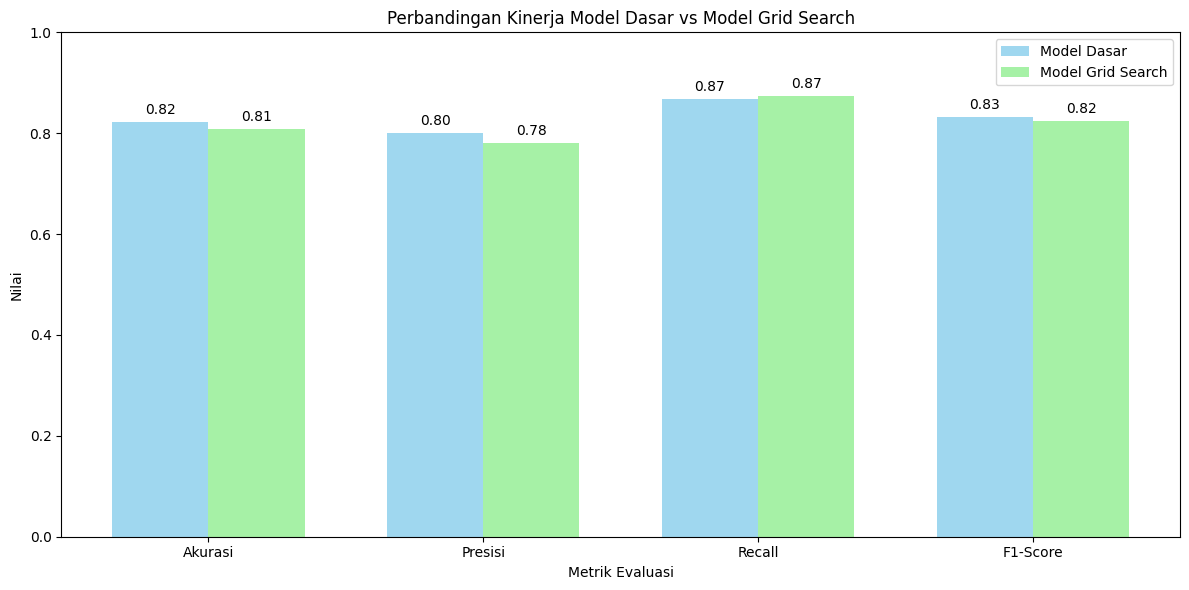

In [41]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x = np.arange(len(comparison_df['Metrik']))
width = 0.35

# Bar chart untuk Model Dasar dan Model Grid Search
plt.bar(x - width/2, comparison_df['Model Dasar'], width,
        label='Model Dasar', alpha=0.8, color='skyblue')
plt.bar(x + width/2, comparison_df['Model Grid Search'], width,
        label='Model Grid Search', alpha=0.8, color='lightgreen')

# Label sumbu dan judul
plt.xlabel('Metrik Evaluasi')
plt.ylabel('Nilai')
plt.title('Perbandingan Kinerja Model Dasar vs Model Grid Search')
plt.xticks(x, comparison_df['Metrik'])
plt.ylim(0, 1)
plt.legend()

# Tambahkan nilai angka di atas bar
for i, (base, best) in enumerate(zip(comparison_df['Model Dasar'], comparison_df['Model Grid Search'])):
    plt.text(i - width/2, base + 0.01, f'{base:.2f}', ha='center', va='bottom')
    plt.text(i + width/2, best + 0.01, f'{best:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



Distribusi Kelas Target:
1 - Sakit Jantung: 526 (51.32%)
0 - Tidak Sakit: 499 (48.68%)


/tmp/ipython-input-73-300654574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


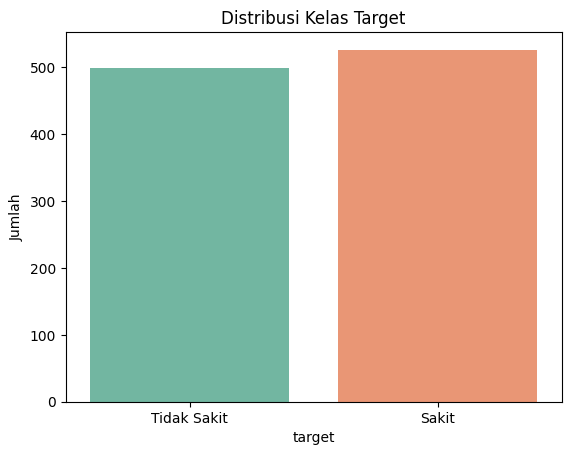

In [73]:
target_counts = df['target'].value_counts()
target_percent = df['target'].value_counts(normalize=True) * 100

print("\nDistribusi Kelas Target:")
for val in target_counts.index:
    print(f"{val} - {'Sakit Jantung' if val == 1 else 'Tidak Sakit'}: {target_counts[val]} ({target_percent[val]:.2f}%)")

# Visualisasi bar
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribusi Kelas Target')
plt.xticks([0, 1], ['Tidak Sakit', 'Sakit'])
plt.ylabel('Jumlah')
plt.show()


In [75]:
# Korelasi kuat terhadap target
corr_target = df.corr()['target'].sort_values(ascending=False)
print("\nKorelasi Fitur terhadap Target (Sakit Jantung):")
print(corr_target)

# Insight awal (manual)
print("\nInsight Awal:")
print("- Pasien dengan nilai 'thalach' tinggi cenderung lebih sehat (berkorelasi negatif dengan target).")
print("- Fitur 'cp' (chest pain), 'slope', dan 'thal' memiliki korelasi positif signifikan terhadap target.")
print("- Dataset relatif seimbang antara pasien sakit dan tidak sakit.")



Korelasi Fitur terhadap Target (Sakit Jantung):
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
oldpeak    -0.390718
exang      -0.438029
Name: target, dtype: float64

Insight Awal:
- Pasien dengan nilai 'thalach' tinggi cenderung lebih sehat (berkorelasi negatif dengan target).
- Fitur 'cp' (chest pain), 'slope', dan 'thal' memiliki korelasi positif signifikan terhadap target.
- Dataset relatif seimbang antara pasien sakit dan tidak sakit.
